In [37]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Flatten,Dense,Lambda,Convolution2D,MaxPooling2D,Dropout,Cropping2D

In [38]:
train = pd.read_csv('train/driving_log.csv',header=None)
images = []
measurements = []

In [39]:
for i,j in train.iterrows():
    img1 = mpimg.imread(j[0])
    img2 = mpimg.imread(j[1])
    img3 = mpimg.imread(j[2])
    images.append(img1)
    images.append(img2)
    images.append(img3)
for i in train[3]:
    correction = 0.2
    measurements.append(float(i))
    measurements.append(float(i)+correction) # left
    measurements.append(float(i)-correction) # right

In [40]:
X_data = np.array(images)
y_data = np.array(measurements)

In [41]:
shape = X_data[1].shape
print(shape)

(160, 320, 3)


In [42]:
model = Sequential()
model.add(Lambda(lambda x: x/255.0 -0.5,input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,20),(0,0))))
model.add(Convolution2D(24,(5,5),strides=(2,2),activation='relu'))
model.add(Convolution2D(36,(5,5),strides=(2,2),activation='relu'))
model.add(Convolution2D(48,(5,5),strides=(2,2),activation='relu'))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

In [43]:
model.compile(loss='mse',optimizer='Adam')
his = model.fit(X_data,y_data,validation_split=0.2,shuffle=True,epochs=6,verbose =1)
model.save('model1.h5')

Train on 5563 samples, validate on 1391 samples
Epoch 1/6
5563/5563 [==============================] - 166s 30ms/step - loss: 0.0382 - val_loss: 0.0247
Epoch 2/6
5563/5563 [==============================] - 145s 26ms/step - loss: 0.0322 - val_loss: 0.0212
Epoch 3/6
5563/5563 [==============================] - 141s 25ms/step - loss: 0.0308 - val_loss: 0.0191
Epoch 4/6
5563/5563 [==============================] - 140s 25ms/step - loss: 0.0293 - val_loss: 0.0213
Epoch 5/6
5563/5563 [==============================] - 138s 25ms/step - loss: 0.0276 - val_loss: 0.0224
Epoch 6/6
5563/5563 [==============================] - 128s 23ms/step - loss: 0.0276 - val_loss: 0.0195


dict_keys(['loss', 'val_loss'])


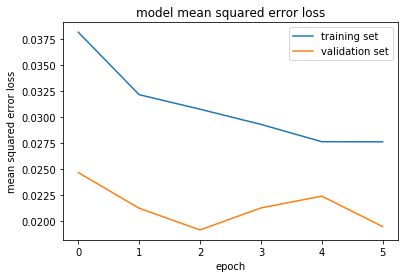

In [44]:
print(his.history.keys())

### plot the training and validation loss for each epoch
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()